# Libraries

In [71]:
from datetime import datetime
import pandas as pd
import numpy as np
# from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Uploading data

In [110]:
column_names = ['Date','DDK', 'USD', 'GBD','JPY']
df = pd.read_csv("./DNVALD.csv",header=0, names=column_names)
df['Date'] = pd.to_datetime(df['Date'], format='%YM%mD%d')

#Transforming the currencies to DDK as today 12/13/23 (from google), with more time an API would be implemented
df['USD'] = df['USD']*0.14
df['GBD'] = df['GBD']*0.12
df['JPY'] = df['JPY']*21.07

print(df)

           Date    DDK     USD      GBD      JPY
0    2018-01-02  744.4  86.380  100.416  115.885
1    2018-01-03  744.4  86.688  100.776  115.885
2    2018-01-04  744.5  86.394  100.260  115.885
3    2018-01-05  744.6  86.548  100.524  115.885
4    2018-01-08  744.7  87.080  101.076  115.885
...         ...    ...     ...      ...      ...
1478 2023-12-05  745.6  96.502  104.376   99.029
1479 2023-12-06  745.6  96.852  104.508   99.029
1480 2023-12-07  745.5  96.908  104.328  101.136
1481 2023-12-08  745.6  96.852  104.412  101.136
1482 2023-12-11  745.6  97.048  104.556   99.029

[1483 rows x 5 columns]


# Exchange rate and cross rate dynamics

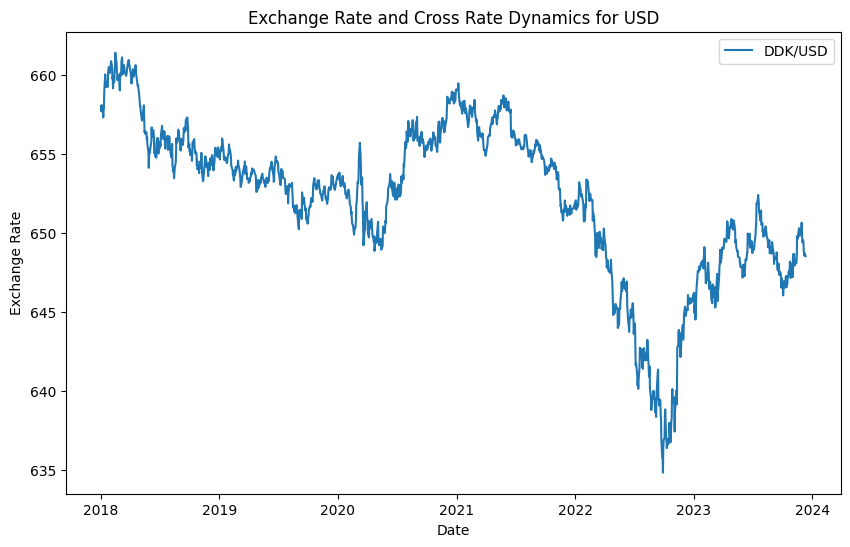

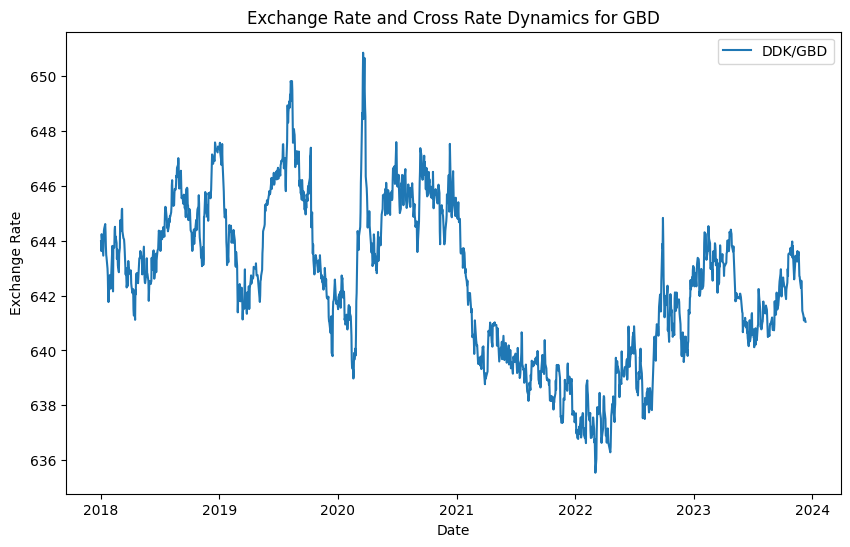

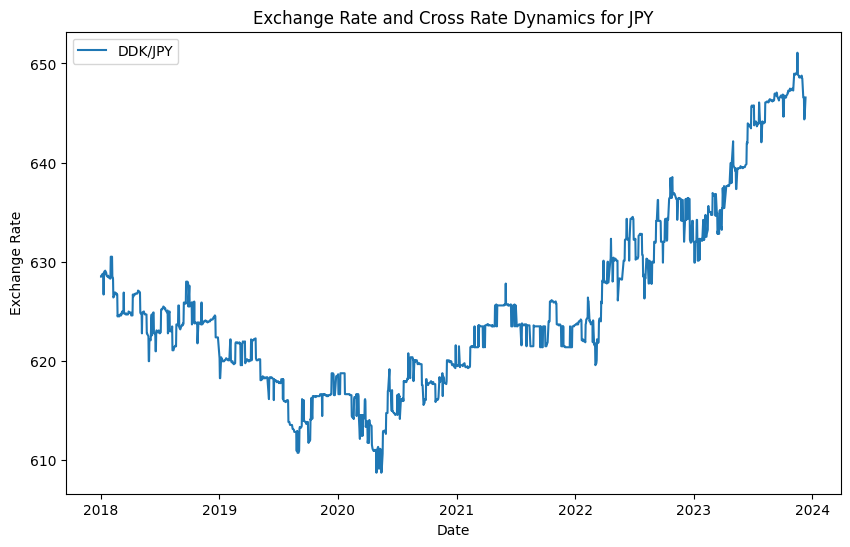

In [91]:
def visualize_dynamics(currency):

    currency_df = df[['Date', 'DDK', f'{currency}']]
    
    plt.figure(figsize=(10, 6))
    plt.plot(currency_df['Date'], currency_df['DDK'] - currency_df[f'{currency}'], label=f'DDK/{currency}')
    plt.title(f'Exchange Rate and Cross Rate Dynamics for {currency}')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

currencies = ['USD', 'GBD','JPY']
for currency in currencies:
    visualize_dynamics(currency)

# Highest appreciation and depreciation against Danish krone 

In [112]:
def find_extreme_values(currency):
    max_value_index = df[f'{currency}'].idxmax()
    min_value_index = df[f'{currency}'].idxmin()
    
    max_value_date = df.loc[max_value_index, 'Date']
    min_value_date = df.loc[min_value_index, 'Date']
    
    max_value = df.loc[max_value_index, f'{currency}']
    min_value = df.loc[min_value_index, f'{currency}']
    
    return {
        'currency': currency,
        'max_value_date': max_value_date,
        'max_value': max_value,
        'min_value_date': min_value_date,
        'min_value': min_value
    }

extreme_values = [find_extreme_values(currency) for currency in currencies]

for result in extreme_values:
    print(f"For {result['currency']}:")
    print(f"Highest Depreciation: {result['min_value']} on {result['min_value_date']}")
    print(f"Highest Appreciation: {result['max_value']} on {result['max_value_date']}\n")



For USD:
Highest Depreciation: 83.412 on 2018-02-02 00:00:00
Highest Appreciation: 108.85000000000001 on 2022-09-28 00:00:00

For GBD:
Highest Depreciation: 96.432 on 2020-03-23 00:00:00
Highest Appreciation: 108.36 on 2022-03-04 00:00:00

For JPY:
Highest Depreciation: 94.815 on 2023-11-16 00:00:00
Highest Appreciation: 136.955 on 2020-04-29 00:00:00



# Highest appreciation and depreciation against Danish krone for one day

In [ ]:
# TODO: If I had more time I would have calculated the daily change in a new column. Then, like in the previous point, I would find the max and min Depreciation and Appreciation for the new column